<a href="https://colab.research.google.com/github/Ansalnakhan/PROJECT/blob/main/ansalnaSOHandRUL05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [228]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

In [229]:
import pandas as pd

In [230]:
data=pd.read_csv("/content/file1.csv")
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
0,0,1,24,2008-04-02 15:25:41,1.856487,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000
1,1,1,24,2008-04-02 15:25:41,1.856487,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781
2,2,1,24,2008-04-02 15:25:41,1.856487,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703
3,3,1,24,2008-04-02 15:25:41,1.856487,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781
4,4,1,24,2008-04-02 15:25:41,1.856487,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922
...,...,...,...,...,...,...,...,...,...,...,...
50280,50280,168,24,2008-05-27 20:45:42,1.325079,3.579262,-0.001569,34.864823,0.0006,0.000,2781.312
50281,50281,168,24,2008-05-27 20:45:42,1.325079,3.581964,-0.003067,34.814770,0.0006,0.000,2791.062
50282,50282,168,24,2008-05-27 20:45:42,1.325079,3.584484,-0.003079,34.676258,0.0006,0.000,2800.828
50283,50283,168,24,2008-05-27 20:45:42,1.325079,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [231]:
data=data.drop_duplicates(subset=['cycle'], keep='last')
data

,Unnamed: 0,cycle,ambient_temperature,datetime,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
196,196,1,24,2008-04-02 15:25:41,1.856487,3.277170,-0.006528,34.230853,-0.0006,0.0,3690.234
392,392,2,24,2008-04-02 19:43:48,1.846327,3.300245,-0.000448,34.392137,-0.0006,0.0,3672.344
587,587,3,24,2008-04-03 00:01:06,1.835349,3.327451,0.001026,34.232779,-0.0006,0.0,3651.641
781,781,4,24,2008-04-03 04:16:37,1.835263,3.314182,-0.002234,34.413450,-0.0006,0.0,3631.563
975,975,5,24,2008-04-03 08:33:25,1.834646,3.305497,0.000009,34.345885,-0.0006,0.0,3629.172
...,...,...,...,...,...,...,...,...,...,...,...
49092,49092,164,24,2008-05-26 10:44:38,1.293464,3.615561,-0.002548,34.075649,0.0006,0.0,2793.390
49389,49389,165,24,2008-05-26 15:30:43,1.288003,3.621191,-0.002460,33.991350,0.0006,0.0,2793.390
49686,49686,166,24,2008-05-26 20:21:04,1.287453,3.619185,0.000478,34.059198,0.0006,0.0,2792.485
49984,49984,167,24,2008-05-27 15:52:41,1.309015,3.595365,-0.002342,34.556514,0.0006,0.0,2802.016


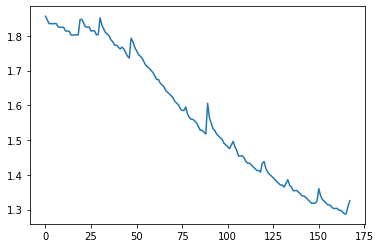

In [232]:
import matplotlib.pyplot as plt
plt.plot(range(len(data["capacity"])),data["capacity"])
plt.show()

In [233]:
capacity=data[["capacity"]]
capacity=capacity.set_index(pd.Index(range(len(capacity))))
capacity

,capacity
0,1.856487
1,1.846327
2,1.835349
3,1.835263
4,1.834646
...,...
163,1.293464
164,1.288003
165,1.287453
166,1.309015


In [234]:
soh=[]
for i in range(len(capacity)):
  soh.append(capacity.loc[i].at["capacity"]/capacity.loc[0].at["capacity"])

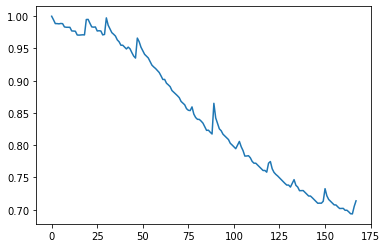

In [235]:
plt.plot(range(len(soh)),soh)
plt.show()

In [236]:
capacity=np.asarray(capacity)

In [237]:
type(capacity)

numpy.ndarray

In [238]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(soh[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k]  

In [239]:
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [240]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.6464
Epoch 2/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0614
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0445
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0118
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0018
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0071
Epoch 9/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0015
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0017


In [241]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [242]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error,r2_score

In [243]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 4ms/step


0.00010650706428680872

In [244]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 0.010


In [245]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.00777655]
R2_score:  0.8584846247766902


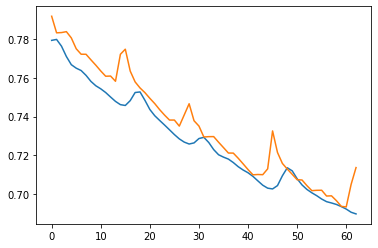

In [246]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)

In [247]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [248]:
preds

array([[0.94078904],
       [0.9394497 ],
       [0.93923175],
       [0.93900174],
       [0.93775433],
       [0.9358917 ],
       [0.93476176],
       [0.9341381 ],
       [0.932746  ],
       [0.93078965],
       [0.9293164 ],
       [0.927599  ],
       [0.9255475 ],
       [0.9244643 ],
       [0.9243455 ],
       [0.9257776 ],
       [0.93150586],
       [0.9392072 ],
       [0.941848  ],
       [0.93934864],
       [0.93629885],
       [0.9346489 ],
       [0.93299764],
       [0.93101025],
       [0.9295758 ],
       [0.92787254],
       [0.9273996 ],
       [0.93204194],
       [0.93754137],
       [0.93671495],
       [0.9321054 ],
       [0.9279518 ],
       [0.9248439 ],
       [0.92165047],
       [0.9180529 ],
       [0.91460234],
       [0.9119015 ],
       [0.9099887 ],
       [0.9083056 ],
       [0.9073265 ],
       [0.9066696 ],
       [0.9044739 ],
       [0.90066063],
       [0.89870685],
       [0.9035918 ],
       [0.9114234 ],
       [0.9127108 ],
       [0.908

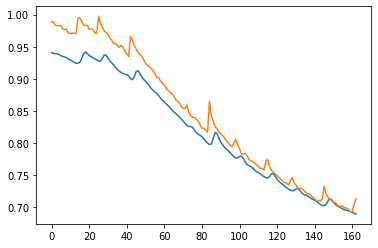

In [249]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)

Predicting Capacity

In [250]:
timestep = 5

X= []
Y=[]

cap=capacity

for i in range(len(capacity)- (timestep)):
    X.append(capacity[i:i+timestep])
    Y.append(capacity[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 100
Xtrain = X[:k,:,:]  
Ytrain = Y[:k] 

In [219]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(5, 1)))
model.add(Conv1D(filters=256, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(Xtrain, Ytrain, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 2.2544
Epoch 2/10
4/4 [==============================] - 0s 4ms/step - loss: 0.2346
Epoch 3/10
4/4 [==============================] - 0s 5ms/step - loss: 0.1742
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.1683
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0375
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0633
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0077
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0306
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0111


In [220]:
Xtest = X[k:,:,:]  
Ytest= Y[k:]  

In [221]:
preds = model.predict(Xtest)



Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 



Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 


mean_squared_error(Ytest,preds)

2/2 [==============================] - 0s 6ms/step


0.0004516136000676706

In [222]:
rmse = np.sqrt(mean_squared_error(Ytest, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.021


In [223]:
mae = mean_absolute_error(Ytest,preds,multioutput='raw_values')
r2 = r2_score(Ytest,preds)
print('Mean Absolute Error: ', mae)
print('R2_score: ', r2)

Mean Absolute Error:  [0.02002545]
R2_score:  0.8258962187954105


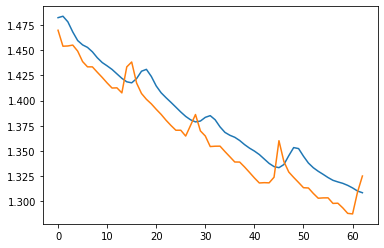

In [224]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Ytest)),Ytest)
plt.show()

In [225]:
preds = model.predict(X)

6/6 [==============================] - 0s 2ms/step


In [226]:
preds

array([[1.7998754],
       [1.7967043],
       [1.7960554],
       [1.7955812],
       [1.7934525],
       [1.7900518],
       [1.7875351],
       [1.7861178],
       [1.783676 ],
       [1.7800967],
       [1.7768836],
       [1.7736384],
       [1.7698661],
       [1.7673645],
       [1.766887 ],
       [1.7696315],
       [1.7796583],
       [1.7937125],
       [1.8006892],
       [1.797186 ],
       [1.7910933],
       [1.7873082],
       [1.784188 ],
       [1.7805455],
       [1.777364 ],
       [1.7741872],
       [1.7733995],
       [1.7807598],
       [1.7909205],
       [1.7917061],
       [1.7833941],
       [1.7748843],
       [1.7685043],
       [1.7623461],
       [1.7554536],
       [1.7486453],
       [1.7431989],
       [1.7391624],
       [1.7359579],
       [1.7338535],
       [1.7323015],
       [1.7285297],
       [1.7215403],
       [1.7175575],
       [1.7251451],
       [1.7390965],
       [1.7441466],
       [1.7368637],
       [1.7266897],
       [1.7186244],


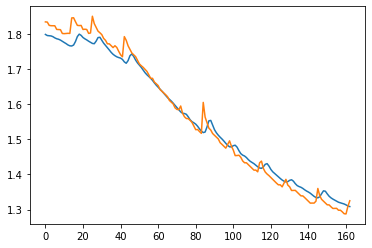

In [227]:
plt.plot(range(len(preds)),preds)
plt.plot(range(len(Y)),Y)
plt.show()